# Decision Tree Classifier

In [2]:
import pandas as pd
import graphviz as gr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix 


In [3]:
# Carregando os dados do csv para o dataframe DF
df = pd.read_csv('../Dados/Credit.csv')
df.shape #usando o atributo .shape para verificar a quantidade de instancias e colunas

(1000, 21)

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
previsores = df.iloc[:,0:20].values
classe = df.iloc[:,20].values

# OBS: 21(0 até 20)

In [6]:
# Conversão dos atributos categóricos para atributos numéricos
labenc = LabelEncoder()
previsores[:,0] = labenc.fit_transform(previsores[:,0])
previsores[:,2] = labenc.fit_transform(previsores[:,2])
previsores[:,3] = labenc.fit_transform(previsores[:,3])
previsores[:,5] = labenc.fit_transform(previsores[:,5])
previsores[:,6] = labenc.fit_transform(previsores[:,6])
previsores[:,8] = labenc.fit_transform(previsores[:,8])
previsores[:,9] = labenc.fit_transform(previsores[:,9])
previsores[:,11] = labenc.fit_transform(previsores[:,11])
previsores[:,13] = labenc.fit_transform(previsores[:,13])
previsores[:,14] = labenc.fit_transform(previsores[:,14])
previsores[:,16] = labenc.fit_transform(previsores[:,16])
previsores[:,18] = labenc.fit_transform(previsores[:,18])
previsores[:,19] = labenc.fit_transform(previsores[:,19])

In [7]:
# Divisão da base de dados entre treinamento e teste.
# Nesse caso está sendo usado 70% para teste e 30% para treinar(test_size=0.3).
# Random_state=0 para sempre obter a mesma divisão da base quando o código for executado

X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state=0) 

# OBS: essa parte pode ser feita "na mão" para obter mais controle dos dados que são usados no treinamento, 
# analisando qual parte tem um treinamento melhor

In [8]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Exportação da arvore de decisão para o formato .dot e visualização
export_graphviz(arvore, out_file='tree.dot') # gera um arquivo .dot. No vscode existe uma extensão para visualização desse arquivo

In [10]:
previsoes = arvore.predict(X_test)
previsoes

array(['bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', '

In [11]:
confusion = confusion_matrix(y_test, previsoes)
confusion

array([[ 45,  41],
       [ 53, 161]])

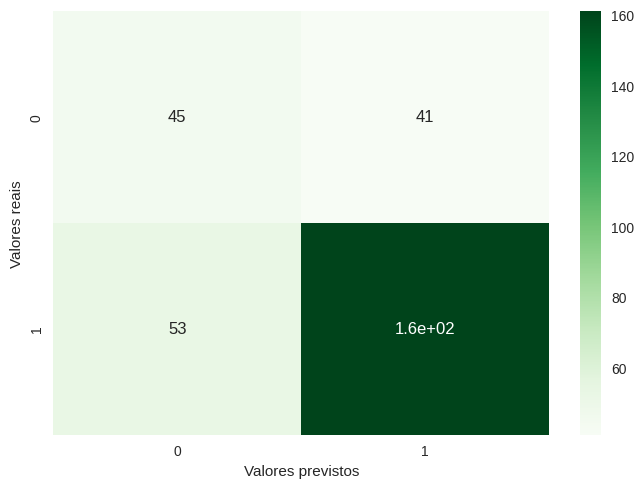

In [19]:
# Plota a matriz de confusão usando seaborn
sns.heatmap(confusion, annot=True, cmap="Greens")

# Adicione rótulos aos eixos x e y
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

In [ ]:
taxa_acerto = accuracy_score(y_test, previsoes)
print(f"{taxa_acerto*100:.1f}%")

66.3%


In [ ]:
taxa_erro = 1 - taxa_acerto
print(f"{taxa_erro*100:.1f}%")

33.7%
